In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rename_coord_titles_to_lat_long(dataset):
    """
    Changes the titles of the coordinates to lat long to keep it consistent
    Args:
    dataset (xr.dataset): dataset with incorrect coordinate titles
    """
    # Define mapping from old to new name

    mapping = {
        'X': 'lon',
        'Y': 'lat'
    }
    
    renamed_dataset = dataset.rename(mapping)

    return renamed_dataset

In [3]:
runoff_ds = xr.open_dataset('/g/data/w97/amu561/CMIP6_runoff_drought/GRUN_data/Processed_data/G-RUN_ensemble_MMM_mm_month_1902_2019.nc')
runoff_ds = rename_coord_titles_to_lat_long(runoff_ds)
runoff = runoff_ds.Runoff

runoff_aus = runoff.sel(lon=slice(112, 155), lat=slice(-45, -9))

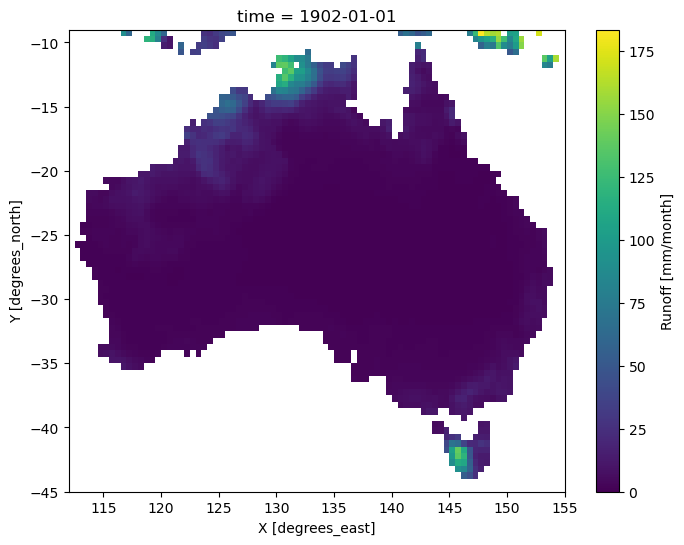

In [4]:
runoff_aus_time0 = runoff_aus.isel(time=0)
runoff_aus_time0.plot(size=6)

In [5]:
precip_ds = xr.open_dataset('/g/data/w97/amu561/AGCD_drought_metrics/AGCD_1900_2021/AGCD_v1_precip_total_r005_monthly_1900_2021.nc')
precip = precip_ds.precip

In [6]:
interpolated_runoff_aus = runoff_aus_time0.interp_like(precip, method='nearest')

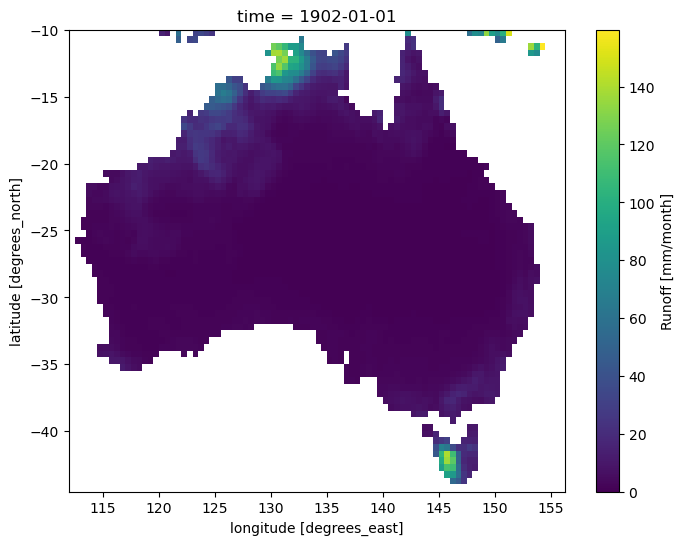

In [7]:
interpolated_runoff_aus.plot(size=6)

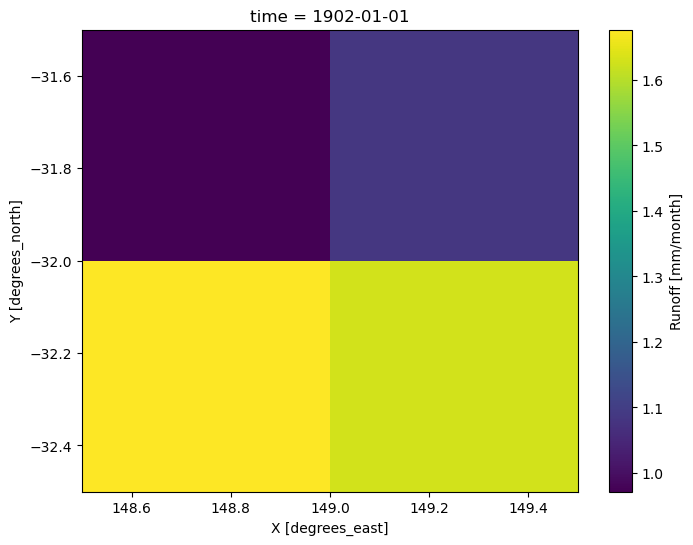

In [8]:
runoff_aus.isel(time=0).sel(lon=slice(148.7, 149.3), lat=slice(-32.25, -31.75)).plot(size=6)

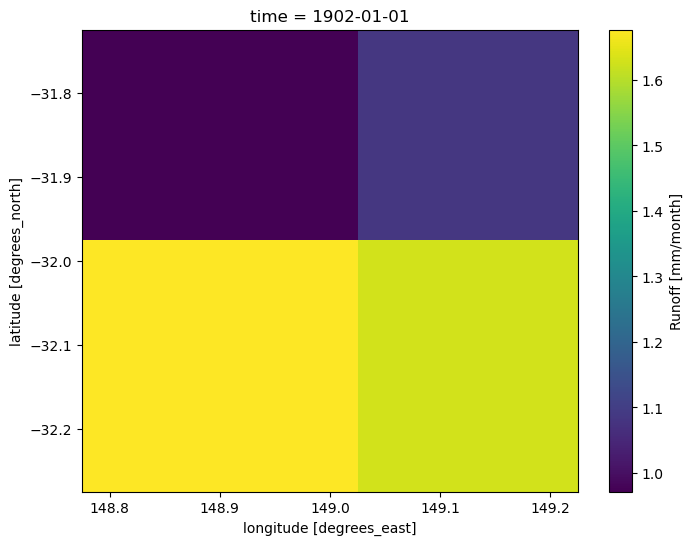

In [9]:
interpolated_runoff_aus.sel(lon=slice(148.8, 149.2), lat=slice(-32.25, -31.75)).plot(size=6)

In [11]:
days_in_month = np.array([31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
        if (CALENDAR[model] == 'gregorian') & (check_leap_year(year) == True):
            days_in_month[2] = 29

        for i in range(12):
            cube_mmpermonth.data[i, ...] = cube_mmperday.data[i, ...] * days_in_month[i]

    cube_mmpermonth.units = 'mm (month)-1'

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [ ]:
import xarray as xr
runoff = xr.open_dataarray('/g/data/w97/mg5624/RF_project/Runoff/G-RUN_ENSEMBLE_MMM.nc')

def check_leap_year(year):
    if (year % 4) == 0:
        if (year % 100) == 0:
            if (year % 400) == 0:
                return True
            else:
                return False
        else:
            return True
    else:
        return False

In [ ]:
runoff = xr.open_dataset('/g/data/iu04/australian-water-outlook/historical/v1/AWRALv7/processed/values/month/qtot.nc')
runoff = runoff.qtot

def rename_coord_titles_to_lat_long(dataset):
    """
    Changes the titles of the coordinates to lat long to keep it consistent
    Args:
    dataset (xr.DataSet): dataset with incorrect coordinate titles
    """
    # Define mapping from old to new name
    
    mapping = {
        'longitude': 'lon',
        'latitude': 'lat'
    }
    
    renamed_dataset = dataset.rename(mapping)

    return renamed_dataset

runoff_renamed = rename_coord_titles_to_lat_long(runoff)
print(runoff_renamed)

In [ ]:
runoff_ds = xr.open_mfdataset('/g/data/iu04/australian-water-outlook/historical/v1/AWRALv7/qtot_*')
runoff = runoff_ds.qtot
print(runoff)
print(sum(runoff.isel(latitude=300, longitude=400).sel(time=slice('1911-01-01', '1911-01-31')).data.compute()))
runoff_monthly = runoff.resample(time='MS').sum(dim='time')
print(runoff_monthly.isel(latitude=300, longitude=400, time=0).data.compute())

In [ ]:
import pandas as pd
import numpy as np

days_in_month_dict = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
time = runoff.coords['time'].data
dates = pd.to_datetime(time)
months = dates.month
years = dates.year

leap_year = [check_leap_year(year) for year in years]
days_in_month = [days_in_month_dict[month] for month in months]
febs = [days==28 for days in days_in_month]
days_in_month = [29 if is_leap and feb else days for is_leap, feb, days in zip(leap_year, febs, days_in_month)]


runoff_monthly_data = runoff.data * np.array(days_in_month)[:, np.newaxis, np.newaxis]

runoff_monthly = runoff.copy(data=runoff_monthly_data)
runoff_monthly.attrs['units'] = 'mm/month'
print(runoff_monthly)

# filepath_save = '/g/data/w97/mg5624/

In [ ]:
runoff_pro = xr.open_dataarray('/g/data/w97/amu561/CMIP6_runoff_drought/GRUN_data/Processed_data/G-RUN_ensemble_MMM_mm_month_1902_2019.nc')
print(runoff_pro.mean())

In [ ]:
import scipy.io
from netCDF4 import Dataset

# Load data from the .mat file
mat_data = scipy.io.loadmat('your_file.mat')  # Replace 'your_file.mat' with the actual file path

# Create a NetCDF file
nc_file = Dataset('output.nc', 'w')  # Replace 'output.nc' with the desired output file name

# Iterate through the variables in the .mat file and write them to the .nc file
for variable_name in mat_data:
    if not variable_name.startswith('__'):  # Avoid internal MATLAB variables
        data = mat_data[variable_name]
        nc_var = nc_file.createVariable(variable_name, data.dtype, data.shape)
        nc_var[:] = data

# Close the NetCDF file
nc_file.close()

In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
# import processing_functions
home_dir = '/home/561/mg5624/RF_project/'
my_data_dir = '/g/data/w97/mg5624/'
shared_data_dir = '/g/data/w97/Shared_data/Observations/'

precip_filepath = my_data_dir + 'RF_project/Precipitation/AGCD/'
ET_filepath = my_data_dir + 'RF_project/ET_products/v3_6/'
SM_filepath = my_data_dir + 'RF_project/Soil_Moisture/v3_8/'


TIME_PERIODS = [
    [1981, 1983],
    # [1980, 2022], 
    # [1911, 2022]
]


AREAS = [
    # 'SE_australia',
    'test'
]


COORDS = {
    'SE_australia': {
        'lats': (-38, -27),
        'lons': (140, 154)
    },
    'test': {
        'lats': (-32, -28),
        'lons': (149, 152)
    },
}


VARS = {
    1981: ['Precipitation', 'ENSO_index', 'PET'],
    1980: ['Precipitation', 'Acc_3-Month_Precipitation', 'Acc_Annual_Precipitation', 'Runoff', 
           'ENSO_index', 'IOD_index', 'SAM_index', 'ET', 'PET', 'SMsurf', 'SMroot', 'Sin_month', 'Cos_month'],
    
    1911: ['Precipitation', 'Acc_3-Month_Precipitation', 'Acc_Annual_Precipitation', 
           'Runoff', 'ENSO_index', 'IOD_index', 'Sin_month', 'Cos_month'],
}


FILES = {
    'Precipitation': precip_filepath + 'AGCD_v1_precip_total_r005_monthly_1900_2021.nc',
    'Acc_3-Month_Precipitation': precip_filepath + 'AGCD_v1_precip_total_r005_3monthly_1900_2021.nc',
    'Acc_Annual_Precipitation': precip_filepath + 'AGCD_v1_precip_total_r005_annual_1900_2021.nc',
    'Runoff': my_data_dir + 'RF_project/Runoff/AWRA/AWRAv7_Runoff_month_1911_2023.nc', 
    'ENSO_index': my_data_dir + 'RF_project/ENSO/ENSO_BEST_index_sorted.csv',
    'IOD_index': my_data_dir + 'RF_project/IOD/IOD_DMI_index_sorted.csv',
    'SAM_index': my_data_dir + 'RF_project/SAM/SAM_AAO_index_sorted.csv',
    'ET': ET_filepath + 'ET/ET_1980-2021_GLEAM_v3.6a_MO_Australia_0.05grid.nc',
    'PET': ET_filepath + 'PET/PET_1980-2021_GLEAM_v3.6a_MO_Australia_0.05grid.nc',
    'SMsurf': SM_filepath + 'SMroot/SMroot_1980-2022_GLEAM_v3.8a_MO_Australia_0.05grid.nc',
    'SMroot': SM_filepath + 'SMsurf/SMsurf_1980-2022_GLEAM_v3.8a_MO_Australia_0.05grid.nc',
}


def add_year_month_coord_to_dataarray(dataarray):
    """
    Adds year, month, and year_month coordinates to the input dataarray. 
    Requires dataarray to have time cooridnate in datetime format.

    Args:
        dataarray (xr.DataArray): dataarray to add coordinates to

    Returns:
        dataarray (xr.DataArray): 
            dataarray with additonal year, month, and year_month coordinates
    """
    # Add year_month coordinates to data
    dataarray['Year'] = dataarray['time'].dt.strftime('%Y')
    dataarray['Month'] = dataarray['time'].dt.strftime('%m')
    dataarray['Year_Month'] = dataarray['Year'] + '-' + dataarray['Month']

    return dataarray


def constrain_data(data, start_year, end_year, area):
    """
    Constrains the data to the specified area.

    Args:
        data (xr.DataArray): the data to be constrained
        start_year (int): start year
        end_year (int): end year
        area (str): name of the area for data to be constrained to

    Returns:
        constrained_data (xr.DataArray): data constrained to are and time bounds
    """
    lats = COORDS[area]['lats']
    lons = COORDS[area]['lons']

    lat_min, lat_max = lats[0], lats[1]
    lon_min, lon_max = lons[0], lons[1]

    start_year = str(start_year)
    end_year = str(end_year)
    
    constrained_data = data.sel(
        time=slice(start_year, end_year),
        lat=slice(lat_min, lat_max),
        lon=slice(lon_min, lon_max)
    )

    return constrained_data


def read_csv_as_dataset(csv_file):
    """
    Opens a csv file as a xr.Dataset.

    Args:
        csv_file (str): filepath to csv file

    Returns:
        ds (xr.Dataset): csv data in a dataset
    """
    df = pd.read_csv(csv_file)
    df.dropna(axis=0)
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
        
    df['time'] = df['Year_Month'] + '-16'
    df['time'] = pd.to_datetime(df['time'])
    df.sort_values(by='time', inplace=True)
    df.drop('Year_Month', axis=1, inplace=True)
    df = df.set_index(['time'])
    ds = df.to_xarray()
    # ds.attrs['Year_Month'] = ds['Year_Month'].values
    # ds = ds.drop_vars('Year_Month')
    return ds


def create_list_of_predictors_ds(start_year, end_year, area):
    """
    Puts all the predictors' datasets into a list. 

    Args:
        start_year (int): start year
        end_year (int): end year
        area (str): one of the areas defined in the COORDS dictionary

    Returns:
        predictors (list): list of datasets of the predictors
    """
    predictors = []
    for variable in VARS[start_year]:
        
        file = FILES[variable]
        if file[-3:] == 'csv':
            predictor_ds = read_csv_as_dataset(file)
        elif file[-2:] == 'nc':
            predictor_ds = xr.open_dataset(file)
        else:
            raise ValueError(f'File type of {new_predictor_name} not supported. '
                             f'Expected .nc or .csv file got file: {file} instead')
            
        if 'lat' and 'lon' in predictor_ds.coords.keys():
            predictor_ds = constrain_data(predictor_ds, start_year, end_year, area)
            
        if 'Year_Month' not in predictor_ds.coords.keys():
            predictor_ds = add_year_month_coord_to_dataarray(predictor_ds)
            
        predictors.append(predictor_ds)

    return predictors


def merge_datasets(predictors):
    """
    Merges the predictors dataset into one dataset.

    Args:
        predictors (list): list of the predictors datasets to be merged together

    Returns:
        predictors_ds (xr.Dataset): Dataset with all the predictors data in it
    """
    predictors_ds = xr.merge(predictors, join='outer')

    return predictors_ds


def add_cyclical_months_to_dataset(predictors_ds):
    """
    Adds variables of sin(month) and cos(month) to the predictors dataset.

    Args:
        predictors_ds (xr.Dataset): dataset with data for RF predictors without cyclical months
    
    Returns:
        predictors_ds (xr.Dataset): Ddataset with data for RF predictors including the cyclical months
    """
    predictors_ds = predictors_ds.assign(
        Sin_month=np.sin(predictors_ds['Month'].astype(int)),
        Cos_month=np.cos(predictors_ds['Month'].astype(int))
    )
    return predictors_ds



def convert_dataset_to_dataframe(predictors_ds):
    """
    Converts predictors dataset into a pandas dataframe.

    Args:
        predictors_ds (xr.Dataset): data of all predictors for RF model 

    Returns:
        predictors_df (pd.DataFrame): dataframe containing all the predictors data for the RF model
    """
    predictors_df = predictors_ds.to_dataframe()
    predictors_df.reset_index(inplace=True)

    coord_rename = {
        'lon': 'Longitude',
        'lat': 'Latitude',
        'time': 'Time',
    }
    
    predictors_df.rename(columns=coord_rename, inplace=True)

    predictors_df['Latitude'] = predictors_df['Latitude'].astype(float).round(2)
    predictors_df['Longitude'] = predictors_df['Longitude'].astype(float).round(2)

    # column_order = ['K', 'L', 'M'] + [col for col in df.columns if col not in ['K', 'L', 'M']]
    return predictors_df

predictors_ds = merge_datasets(
        create_list_of_predictors_ds(1981, 1983, 'test')
)


predictors_ds = add_cyclical_months_to_dataset(predictors_ds)
print(predictors_ds)

In [ ]:
precip_df = predictors_df.loc[predictors_df['Longitude'] == 149].loc[predictors_df['Latitude'] == -32]
precip_df = precip_df[['Time', 'Precipitation']]
print(precip_df)
precip_df.plot('Time', 'Precipitation')

In [ ]:
import xarray as xr
import pandas as pd

def set_time_coord_to_year_month_datetime(data):
    """
    Sets the time coordinate of the data to be year-month datetime format.

    Args:
        data (xr.Dataset or xr.DataArray): data for which time coord needs edited

    Returns:
        data_out (xr.Dataset or xr.DataArray): data with year-month time coord
    """
    time = data['time'].values
    
    # Time in year-month datetime format
    year_month_time = [pd.to_datetime(dt).replace(day=1) for dt in time]

    # Replace time coordinate with year-month datetime
    data_out = data.assign_coords(time=year_month_time)

    return data_out

data = xr.open_dataarray('/g/data/w97/mg5624/RF_project/Precipitation/AGCD/AGCD_v1_precip_total_r005_monthly_1900_2021.nc')

data_year_month = set_time_coord_to_year_month_datetime(data)
print(data_year_month)

In [ ]:
precip = xr.open_dataarray('/g/data/w97/mg5624/RF_project/Precipitation/AGCD/AGCD_v1_precip_total_r005_monthly_1900_2021.nc')
print(precip['time'].values)

In [ ]:
import xarray as xr
ET = xr.open_dataarray('/g/data/w97/mg5624/RF_project/ET_products/v3_6/ET/ET_1980-2021_GLEAM_v3.6a_MO_Australia_0.05grid.nc')
print(ET)

In [ ]:
precip_ds = xr.open_dataset(
    '/g/data/w97/amu561/AGCD_drought_metrics/AGCD_1900_2021/AGCD_v1_precip_total_r005_monthly_1900_2021.nc'
)
precip = precip_ds.precip

def rename_and_save_precipitation_dataarray(precip_ds):
    """
    Takes the precip datarray from precip dataset, renames it to Precipitation and saves it on it as a netcdf.

    Args:
        precip_ds (xr.Dataset): dataset of AGCD precip
    """
    precip = precip_ds.precip
    precip_renamed = precip.rename('Precipitation')
    # precip_constrained = processing_functions.constrain_to_australia(precip_renamed)
    precip_year_month_dt = set_time_coord_to_year_month_datetime(precip_renamed)
    print(precip_year_month_dt)
    return precip_year_month_dt

rename_and_save_precipitation_dataarray(precip_ds)

In [ ]:
import pandas as pd
enso = '/g/data/w97/mg5624/RF_project/SAM/SAM_AAO_index_sorted.csv'

In [ ]:
def read_csv_as_dataset(csv_file):
    """
    Opens a csv file as a xr.Dataset.

    Args:
        csv_file (str): filepath to csv file

    Returns:
        ds (xr.Dataset): csv data in a dataset
    """
    df = pd.read_csv(csv_file)
    df.dropna(axis=0)
    
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
        
    df['time'] = df['Year_Month'] + '-01'
    df['time'] = pd.to_datetime(df['time'])

    df.drop('Year_Month', axis=1, inplace=True)
    df.sort_values(by='time', inplace=True)
    df = df.set_index(['time'])
    ds = df.to_xarray()
    return ds

ds = read_csv_as_dataset(enso)
print(ds)

In [ ]:
VARS = ['Precipitation', 'Acc_3-Month_Precipitation', 'Acc_12-Month_Precipitation', 'Runoff', 
        'ENSO_index', 'IOD_index', 'SAM_index', 'ET', 'PET', 'SMsurf', 'SMroot']

FILES = {
    'Precipitation': precip_filepath + 'AGCD_v1_precip_total_r005_monthly_1900_2021.nc',
    'Acc_3-Month_Precipitation': precip_filepath + 'AGCD_v1_precip_total_r005_3monthly_1900_2021.nc',
    'Acc_12-Month_Precipitation': precip_filepath + 'AGCD_v1_precip_total_r005_12monthly_1900_2021.nc',
    'Runoff': processing_functions.my_data_dir + 'RF_project/Runoff/AWRA/AWRAv7_Runoff_month_1911_2023.nc', 
    'ENSO_index': processing_functions.my_data_dir + 'RF_project/ENSO/ENSO_BEST_index_sorted.csv',
    'IOD_index': processing_functions.my_data_dir + 'RF_project/IOD/IOD_DMI_index_sorted.csv',
    'SAM_index': processing_functions.my_data_dir + 'RF_project/SAM/SAM_AAO_index_sorted.csv',
    'ET': ET_filepath + 'ET/ET_1980-2021_GLEAM_v3.6a_MO_Australia_0.05grid.nc',
    'PET': ET_filepath + 'PET/PET_1980-2021_GLEAM_v3.6a_MO_Australia_0.05grid.nc',
    'SMsurf': SM_filepath + 'SMroot/SMroot_1980-2022_GLEAM_v3.8a_MO_Australia_0.05grid.nc',
    'SMroot': SM_filepath + 'SMsurf/SMsurf_1980-2022_GLEAM_v3.8a_MO_Australia_0.05grid.nc',
}

for var in VARS:
    file = FILES[var]
    if file[-2:] == 'nc':
        

In [ ]:
predictors_long_ts = xr.open_dataset('/g/data/w97/mg5624/RF_project/predictors_data/predictors_dataframe_1911-2022_SE_australia.csv')
predictors_full = xr.open_dataset('/g/data/w97/mg5624/RF_project/predictors_data/predictors_dataframe_1980-2022_SE_australia.csv')
# dropna(dim='lon')
# print(predictors_long_ts)
print(predictors_full.SMroot.to_dataframe().dropna())
# print(predictors_full.ET.to_dataframe().dropna())
print(predictors_full.ET.to_dataframe().dropna())

In [ ]:
print(predictors_full.Precipitation['lat'].values[:10])
print(predictors_full.ET['lat'].values[:10])
print(predictors_full['lat'].values[:10])

# Covariance Plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data to test on
training_data = pd.read_csv('/g/data/w97/mg5624/RF_project/training_data/training_data.csv')

print(training_data.columns)
variables = ['Precipitation', 'Acc_3-Month_Precipitation', 'Acc_6-Month_Precipitation', 'Acc_12-Month_Precipitation', 
             'Acc_24-Month_Precipitation', 'Runoff', 'ENSO_index', 'IOD_index', 'SAM_index', 'ET', 'PET', 'SMsurf', 
             'SMroot', 'Sin_month', 'Cos_month']

def create_variable_correlation_plot(dataframe, variables):
    """
    Creates a heatmap of the variable correlations of the variables in the dataframe specified.

    Args:
        dataframe (pd.DataFrame): 
    """
    training_data_vars_only = training_data[variables]
    
    corr_df = training_data_vars_only.corr()
    
    sns.heatmap(corr_df, vmin=-1, vmax=1, cmap='RdBu')
    plt.savefig('/g/data/w97/mg5624/plots/RF_project/variable_correlation/training_data_variable_correlation.png')
    plt.show()


In [ ]:
# predictors_df_full = pd.read_csv('/g/data/w97/mg5624/RF_project/predictors_data/predictors_dataframe_1980-2022_SE_australia.csv')
# print(predictors_df_full.columns)

In [ ]:
import xarray as xr
file = '/g/data/w97/mg5624/RF_project/drought_prediction/full_model/drought_prediction_dataset_full_model.nc'
ds = xr.open_dataset(file)
rename_dict = {
    'Drought': 'drought',
    'Probability of Drought': 'drought_proba',
    'Probability of No Drought': 'no_drought_proba',
}
ds = ds.rename(rename_dict)

ds.to_netcdf('/g/data/w97/mg5624/RF_project/drought_prediction/full_model/drought_prediction_dataset_full_model.nc')
print(ds)

In [ ]:
import xarray as xr
import pandas as pd

file = '/g/data/w97/mg5624/RF_project/drought_prediction/full_model/drought_prediction_dataset_full_model.nc'
ds = xr.open_dataset(file)

ds['time'] = pd.DatetimeIndex(ds['time'].values)

print(ds)


In [ ]:
import xarray as xr
import pandas as pd

test_df = pd.read_csv('/g/data/w97/mg5624/RF_project/predictors_data/test_model/predictors_dataframe_1981-1983_test.csv')
# print(test_df.loc[pd.to_datetime(test_df['time']).dt.strftime('%Y-%m')=='1981-01'].loc[test_df['lon']==149.0].loc[test_df['lat']==-32.00])
print(test_df.loc[test_df['Year_Month']=='1981-02'].loc[test_df['lon']==149.0].loc[test_df['lat']==-32.00])

In [ ]:
precip_ds = xr.open_dataarray('/g/data/w97/mg5624/RF_project/Precipitation/AGCD/AGCD_v1_precip_total_r005_3monthly_1900_2021.nc')
# precip_ds['time'] = precip_ds['time'].dt.floor("D")
print(precip_ds['time'].values)

## N-Month Mean Data

In [19]:
datadir = '/g/data/w97/mg5624/RF_project/'
data = xr.open_dataarray(datadir + 'ET_products/v3_6/ET/ET_1980-2021_GLEAM_v3.6a_MO_Australia_0.05grid.nc')

def create_n_month_mean(data, n_months):
    """
    Creates n-month mean data of input monthly data.

    Args:
        data (xr.DataArray): monthly data to take find n-month means of
        n_months (int): number of months to aggreagte over

    Returns:
        n_month_mean (xr.DataArray): n month averaged data
    """
    n_month_mean = data.rolling(time=n_months).mean()

    return n_month_mean
    
test = data.sel(time=slice('1980-01', '1980-05')).sel(lat=-31, lon=150, method='nearest')
print(test.data)
n_month_data = create_n_month_mean(test, 3)
print(n_month_data.data)

[151.4079    69.21062   46.207153  14.886356  26.87767 ]
[      nan       nan 88.941895 43.434715 29.32373 ]


## Training Data on Precip Drought Def

[0. 0. 0. ... 0. 0. 0.]


In [7]:
import xarray as xr
path = '/g/data/w97/amu561/Steven_CABLE_runs/drought_metrics_AGCD/3-month/drought_metrics_AGCD_precip_1900_2021_baseline_1970_2005_scale_3.nc'
precip_drought_ds = xr.open_dataset(path)
precip_drought = precip_drought_ds.timing

precip = xr.open_dataarray('/g/data/w97/mg5624/RF_project/Precipitation/AGCD/AGCD_v1_precip_total_r005_monthly_1900_2021.nc')
print(precip['time'])
# print(precip_drought)


precip_drought['time'] = precip['time']
print(precip_drought)

precip_drought = add_year_month_coord_to_dataarray(precip_drought)
print(precip_drought)


<xarray.DataArray 'time' (time: 1464)>
array(['1900-01-01T00:00:00.000000000', '1900-02-01T00:00:00.000000000',
       '1900-03-01T00:00:00.000000000', ..., '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2021-12-01
<xarray.DataArray 'timing' (time: 1464, lat: 691, lon: 886)>
[896298864 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * lat      (lat) float64 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2021-12-01
Attributes:
    long_name:  drought event timing (binary drought/non-drought index)
<xarray.DataArray 'timing' (time: 1464, lat: 691, lon: 886)>
[896298864 values with dtype=float64]
Coordinates:
  * lon         (lon) float64 112.0 112.1 112.1 112.2 ... 156.1 156.2 156.2
  * lat   